## Credit Card Fraud Detection Project 

In [62]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [3]:
df=pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

NOTE: NO NULL VALUES AND ALL VALUES ARE NUMERICAL

In [27]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### The dataset is highly imbalanced 

<Axes: xlabel='Class', ylabel='count'>

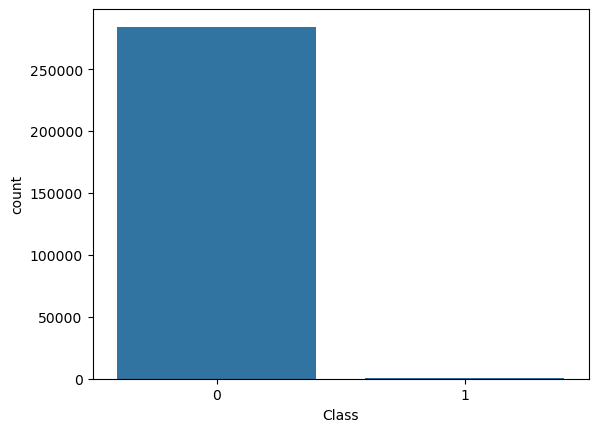

In [9]:
sns.countplot(data=df,x=df["Class"])

----

#### Undersampling the data

In [18]:
legit_data=df[df["Class"]==0]
fraud_data=df[df["Class"]==1]

In [28]:
legit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,94664.550813,0.110347,0.061996,-0.014899,0.008906,-0.052592,-0.050140,-0.050329,-0.040850,-0.037087,...,0.012055,-0.024541,-0.024055,0.041649,0.011824,-0.011687,0.001316,0.000720,84.733191,0.0
std,46730.224157,1.635768,1.288537,1.390406,1.344896,1.185329,1.218023,1.017992,1.166959,1.011028,...,0.775362,0.728857,0.384964,0.564841,0.512096,0.507470,0.332868,0.197007,194.716101,0.0
min,946.000000,-8.655629,-7.405352,-7.205453,-4.938824,-4.744819,-3.151032,-8.683362,-13.372874,-3.456592,...,-7.341463,-3.390005,-3.362671,-1.942442,-2.310427,-1.354976,-3.938535,-2.173143,0.000000,0.0
25%,54522.250000,-0.894453,-0.563909,-0.893778,-0.756731,-0.740724,-0.751557,-0.583211,-0.205518,-0.649103,...,-0.225407,-0.565417,-0.161843,-0.296051,-0.314925,-0.338370,-0.056342,-0.047890,4.990000,0.0
50%,84696.000000,0.192223,0.092615,0.164713,-0.041729,-0.119150,-0.297120,0.011538,0.030209,-0.101402,...,-0.024569,-0.016729,-0.006590,0.066326,0.061433,-0.088274,0.003709,0.014943,19.995000,0.0
75%,136723.500000,1.298092,0.785793,0.931371,0.791312,0.495648,0.309056,0.489874,0.265200,0.571558,...,0.187089,0.477592,0.139468,0.434968,0.359629,0.250105,0.092840,0.073527,69.010000,0.0
max,172305.000000,2.319679,6.968727,3.709866,5.338159,6.313779,5.187998,4.263032,6.516365,4.195295,...,8.186443,3.820867,1.854528,1.174797,2.495976,2.845443,1.232754,0.717664,2127.400000,0.0


In [29]:
fraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [19]:
legit_data=legit_data.sample(n=492)

In [21]:
new_df=pd.concat([legit_data,fraud_data],axis=0)

In [23]:
new_df["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

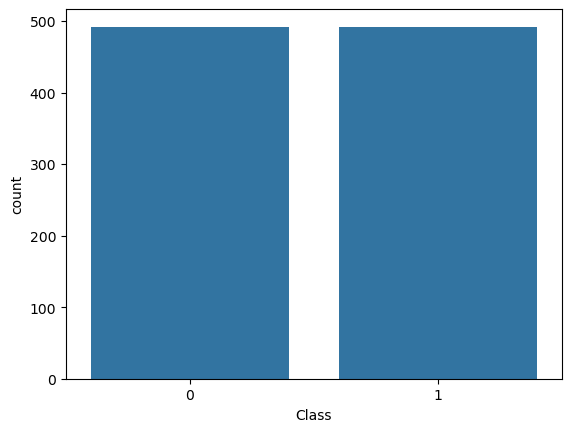

In [25]:
sns.countplot(data=new_df,x=new_df["Class"])

#### Now both the classes have same number of values hence the issue of imbalanced data has been taken care of

<Axes: >

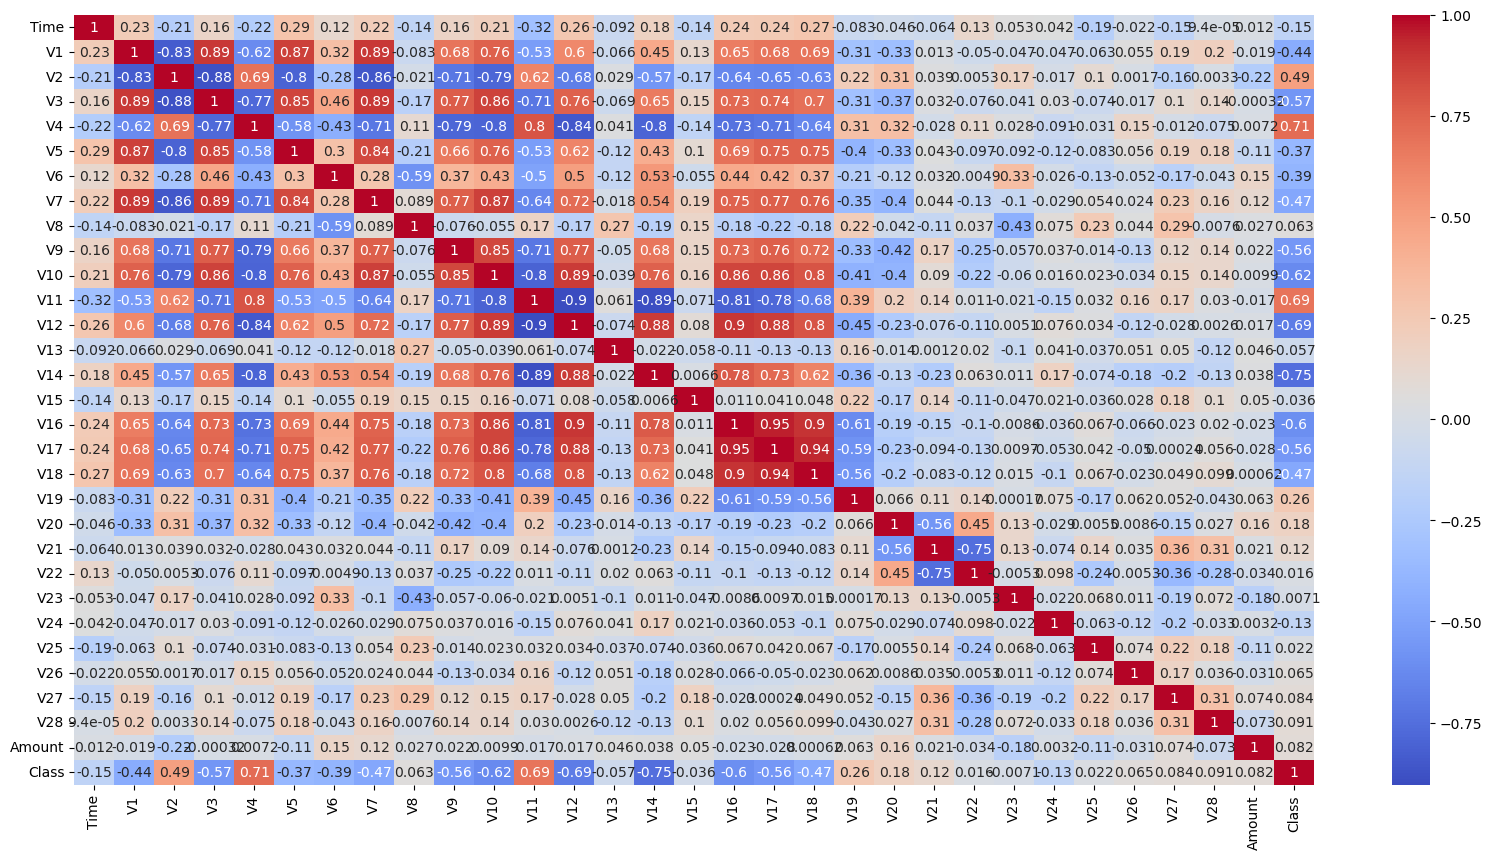

In [40]:

plt.figure(figsize = (20,10))
sns.heatmap(new_df.corr(),annot = True, cmap = 'coolwarm')

<Axes: xlabel='Class', ylabel='Amount'>

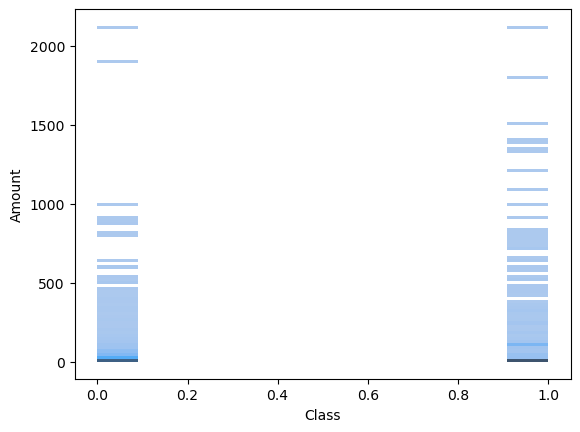

In [45]:
sns.histplot(x=new_df["Class"],y=new_df["Amount"])

## Train Test Split

In [48]:
X=new_df.drop("Class",axis=1)
y=new_df["Class"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#### Linear Regression model

In [56]:
model_lr=LogisticRegression()

model_lr.fit(X_train,y_train)

C:\Users\akhil.nair\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
pred_lr=model_lr.predict(X_test)

print("Accuracy:",accuracy_score(pred_lr,y_test))
print("AUC score",roc_auc_score(pred_lr,y_test))

Accuracy: 0.9390862944162437
AUC score 0.939423672794877


#### Random Forest Classifier

In [63]:
model_rfc=RandomForestClassifier()

In [64]:
model_rfc.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
pred_rfc=model_rfc.predict(X_test)

print("Accuracy:",accuracy_score(pred_rfc,y_test))
print("AUC score",roc_auc_score(pred_rfc,y_test))


Accuracy: 0.9593908629441624
AUC score 0.9617341640706127


#### SVM 

In [72]:
model_svm=svm.SVC(kernel="linear")

In [73]:
model_svm.fit(X_train,y_train)

SVC(kernel='linear')

In [74]:
pred_svm=model_svm.predict(X_test)

print("Accuracy:",accuracy_score(pred_svm,y_test))
print("AUC score",roc_auc_score(pred_svm,y_test))

Accuracy: 0.934010152284264
AUC score 0.9385057471264368


It looks like Random Forest Classifier is the best model to use in this context ! Below are detailed metrics of the model 

In [82]:
print("Confusion matrix")
print("\n")
print(confusion_matrix(pred_rfc,y_test))
print("\n")
print("Classification Report")
print("\n")
print(classification_report(pred_rfc,y_test))

Confusion matrix


[[100   7]
 [  1  89]]


Classification Report


              precision    recall  f1-score   support

           0       0.99      0.93      0.96       107
           1       0.93      0.99      0.96        90

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

